Final params without momentum: [ 0.3530437   0.3060874  -0.10086891 -0.14782521  0.26521849  0.31826219
  0.37130589]
Gradients log without momentum: [[ 20.96        41.92        62.88        83.84       104.8
  125.76       146.72      ]
 [ 20.66656     41.33312     61.99968     82.66624    103.3328
  123.99936    144.66592   ]
 [ 20.37722816  40.75445632  61.13168448  81.50891264 101.8861408
  122.26336896 142.64059712]
 [ 20.09194697  40.18389393  60.2758409   80.36778786 100.45973483
  120.55168179 140.64362876]
 [ 19.81065971  39.62131942  59.43197912  79.24263883  99.05329854
  118.86395825 138.67461796]
 [ 19.53331047  39.06662094  58.59993142  78.13324189  97.66655236
  117.19986283 136.73317331]
 [ 19.25984413  38.51968825  57.77953238  77.0393765   96.29922063
  115.55906475 134.81890888]
 [ 18.99020631  37.98041262  56.97061892  75.96082523  94.95103154
  113.94123785 132.93144416]
 [ 18.72434342  37.44868684  56.17303026  74.89737368  93.6217171
  112.34606052 131.07040394]

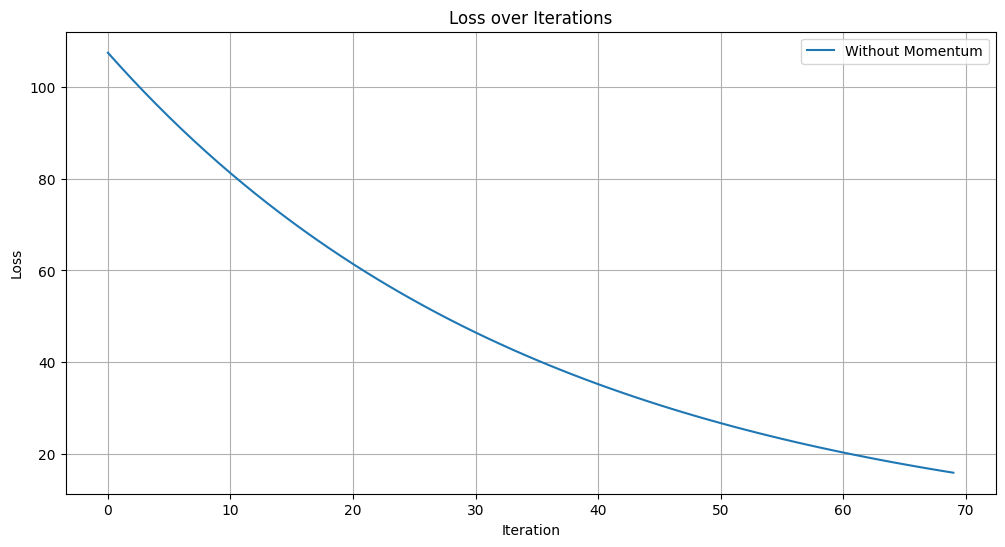

In [10]:
import numpy as np
import traceback
import matplotlib.pyplot as plt

class GradientDescentWithMomentum:
    def __init__(self, iterations, learning_rate):
        self.iterations = iterations
        self.learning_rate = learning_rate

    def get_learning_rate(self):
        # 学習率を取得するメソッド
        return self.learning_rate

    def get_gradients(self, params):
        # サンプルデータ
        X = np.array([
            [1, 2, 3, 4, 5, 6, 7],
            [1, 2, 3, 4, 5, 6, 7],
            [1, 2, 3, 4, 5, 6, 7]
        ])  # 入力データ
        y = np.array([1, 2, 3])  # 出力データ

        # 予測の計算
        predictions = np.dot(X, params)

        # 誤差の計算
        errors = predictions - y

        # 勾配の計算
        gradients = 2 * np.dot(X.T, errors) / len(y)

        # ログ用の勾配も同じにする
        gradients_for_log = gradients

        return gradients, gradients_for_log

    def compute_loss(self, params):
        X = np.array([
            [1, 2, 3, 4, 5, 6, 7],
            [1, 2, 3, 4, 5, 6, 7],
            [1, 2, 3, 4, 5, 6, 7]
        ])  # 入力データ
        y = np.array([1, 2, 3])  # 出力データ
        predictions = np.dot(X, params)
        errors = predictions - y
        loss = np.mean(errors ** 2)
        return loss

    def fit_without_momentum(self, initial_params):
        params = initial_params
        params_log = np.array([params])  # 初期化時に2次元配列として作成
        gradients_log = np.empty((0, 7))  # 初期化時に空の2次元配列を作成
        loss_log = []  # 損失のログ

        for i in range(self.iterations):
            try:
                gradients, gradients_for_log = self.get_gradients(params)
            except Exception as e:
                print(traceback.format_exc())
                print(f"Error occurred: {e}")
                continue

            # モメンタム法を使用しないパラメータの更新
            params = params - self.get_learning_rate() * gradients

            params_log = np.vstack([params_log, params])  # 2次元配列として積み重ね

            gradients_log = np.vstack([gradients_log, gradients_for_log])  # 2次元配列として積み重ね

            # 損失の計算とログ
            loss = self.compute_loss(params)
            loss_log.append(loss)

        return params, gradients_log, params_log, loss_log

# 初期パラメータの設定
initial_params = np.array([0.4, 0.4, 0.04, 0.04, 0.5, 0.6, 0.7])

# モデルのインスタンス化と
model = GradientDescentWithMomentum(iterations=70, learning_rate=0.00005)

# 学習の実行
final_params_without_momentum, gradients_log_without_momentum, params_log_without_momentum, loss_log_without_momentum = model.fit_without_momentum(initial_params)
print("Final params without momentum:", final_params_without_momentum)
print("Gradients log without momentum:", gradients_log_without_momentum)

# 損失関数のログをプロットして比較
plt.figure(figsize=(12, 6))
plt.plot(loss_log_without_momentum, label='Without Momentum')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.legend()
plt.grid(True)
plt.show()
